In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# checking for null values
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
# now lets showcase the relation between feature and Label  (EDA)

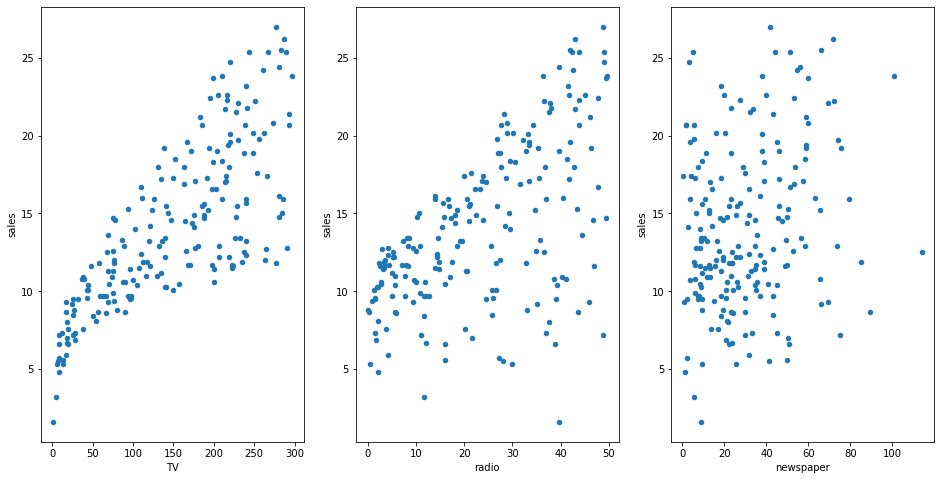

In [10]:
fig, axs = plt.subplots(1,3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

### from this we conclude that while incresing advertisement in TV and Radio sale will increses but there is no relation b/w
newspaper and sales

craete variable and feature

In [12]:
x= data[['TV','radio','newspaper']]
y= data.sales

In [13]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm= LinearRegression()

In [17]:
lm.fit(x,y)

LinearRegression()

In [18]:
# print intercept and coefficient
print('Intercept:', lm.intercept_)
print('TV:', lm.coef_[0])
print('radio:', lm.coef_[1])
print('newspaper:', lm.coef_[2])

Intercept: 2.9388893694594085
TV: 0.045764645455397615
radio: 0.18853001691820448
newspaper: -0.0010374930424763007


In [19]:
# this shows TV and Radio advertisement help in increasing sale while not the newspaper

In [22]:
import statsmodels.formula.api as smf
lm = smf.ols(formula= 'sales~ TV+radio+newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        17:06:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from this we see p value of Tv and radio is less than 0.05 it means there is a relation between Tv and radio with sale but as we check p value of newspaper is more than 0.05 so we can not reject null hypothesis

In [23]:
# only include tv and radio and check model confidence

In [24]:
lm = smf.ols(formula= 'sales~ TV+radio+newspaper', data=data).fit()
lm.rsquared

0.8972106381789521

In [25]:
lm = smf.ols(formula= 'sales~ TV+radio', data=data).fit()
lm.rsquared

0.8971942610828957

As we our model confidence is not changing much while including newspaper as feature

In [27]:
import pickle

In [28]:
filename= 'Sales Channel prediction'
pickle.dump(lm, open(filename,'wb'))